Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read Dataset

In [ ]:
!gdown --id '1rv8GMpX-NaGm0sjz5K80-aFjoHr7YX7a'

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rv8GMpX-NaGm0sjz5K80-aFjoHr7YX7a
To: /content/Robbery.csv
100% 9.18M/9.18M [00:00<00:00, 74.1MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('Robbery.csv')

In [ ]:
num_rows = len(df)

print("Number of rows:", num_rows)

Number of rows: 29230


In [ ]:
df.head()


X             Y  OBJECTID event_unique_id Division  \
0 -8.841973e+06  5.431931e+06      4776  GO-20141621901      D32   
1 -8.831785e+06  5.416119e+06      4777  GO-20141620235      D54   
2 -8.856520e+06  5.426950e+06      4781  GO-20141621683      D31   
3 -8.843291e+06  5.423419e+06      4793  GO-20141623026      D32   
4 -8.822169e+06  5.427516e+06      4794  GO-20141623316      D43   

           occurrencedate            reporteddate  \
0  2014/03/01 05:00:00+00  2014/03/01 05:00:00+00   
1  2014/03/01 05:00:00+00  2014/03/01 05:00:00+00   
2  2014/03/01 05:00:00+00  2014/03/01 05:00:00+00   
3  2014/03/01 05:00:00+00  2014/03/01 05:00:00+00   
4  2014/03/01 05:00:00+00  2014/03/01 05:00:00+00   

                                       location_type premises_type  ucr_code  \
0              Schools During Un-Supervised Activity   Educational      1610   
1  Streets, Roads, Highways (Bicycle Path, Privat...       Outside      1610   
2                   Apartment (Rooming House, Condo)     Apartment      1610   
3                  Open Areas (Lakes, Parks, Rivers)       Outside      1610   
4  Streets, Roads, Highways (Bicycle Path, Privat...       Outside      1610   

   ...  occurrenceday occurrencedayofyear  occurrencedayofweek occurrencehour  \
0  ...            1.0                60.0           Saturday               16   
1  ...            1.0                60.0           Saturday                6   
2  ...            1.0                60.0           Saturday               15   
3  ...            1.0                60.0           Saturday               20   
4  ...            1.0                60.0           Saturday               21   

   mci_category  Hood_ID        Neighbourhood  Longitude   Latitude ObjectId2  
0       Robbery       36     Newtonbrook West -79.428796  43.783060         1  
1       Robbery       66             Danforth -79.337275  43.680421         2  
2       Robbery       21        Humber Summit -79.559471  43.750742         3  
3       Robbery       32  Englemount-Lawrence -79.440632  43.727829         4  
4       Robbery      127              Bendale -79.250893  43.754414         5  

[5 rows x 30 columns]

Step 1 : Data Cleaning

In [ ]:
# Check for missing values
print(df.isnull().sum())

X                      0
Y                      0
OBJECTID               0
event_unique_id        0
Division               0
occurrencedate         0
reporteddate           0
location_type          0
premises_type          0
ucr_code               0
ucr_ext                0
offence                0
reportedyear           0
reportedmonth          0
reportedday            0
reporteddayofyear      0
reporteddayofweek      0
reportedhour           0
occurrenceyear         2
occurrencemonth        2
occurrenceday          2
occurrencedayofyear    2
occurrencedayofweek    2
occurrencehour         0
mci_category           0
Hood_ID                0
Neighbourhood          0
Longitude              0
Latitude               0
ObjectId2              0
dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates
print(df.duplicated().sum())

len(df)

0


29228

In [ ]:
# Convert date and time columns to datetime format
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])
df['reporteddate'] = pd.to_datetime(df['reporteddate'])

# Rename columns
df.rename(columns={'Hood_ID': 'neighborhood_id',
                   'Long': 'longitude',
                   'Lat': 'latitude',
                   'MCI': 'crime_category'}, inplace=True)

# Remove irrelevant columns
#todo

In [ ]:
# Check for outliers
print(df.describe())

# Check for inconsistencies
print(df[df['occurrencedate'] > df['reporteddate']])

                  X             Y       OBJECTID      ucr_code       ucr_ext  \
count  2.922800e+04  2.922800e+04   29228.000000  29228.000000  29228.000000   
mean  -8.661962e+06  5.312420e+06  135865.526653   1610.000034    177.145545   
std    1.235818e+06  7.579414e+05   83845.698714      0.005849     43.473785   
min   -8.895744e+06  0.000000e+00      24.000000   1610.000000    100.000000   
25%   -8.847133e+06  5.413044e+06   65234.750000   1610.000000    140.000000   
50%   -8.837275e+06  5.419146e+06  128671.500000   1610.000000    200.000000   
75%   -8.828493e+06  5.427378e+06  204052.250000   1610.000000    210.000000   
max    0.000000e+00  5.474037e+06  301189.000000   1611.000000    220.000000   

       reportedyear   reportedday  reporteddayofyear  reportedhour  \
count  29228.000000  29228.000000       29228.000000  29228.000000   
mean    2017.470029     15.760743         180.085466     13.624230   
std        2.352522      8.754264         105.331289      7.286022   

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
df2=df

Data Explanatory

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


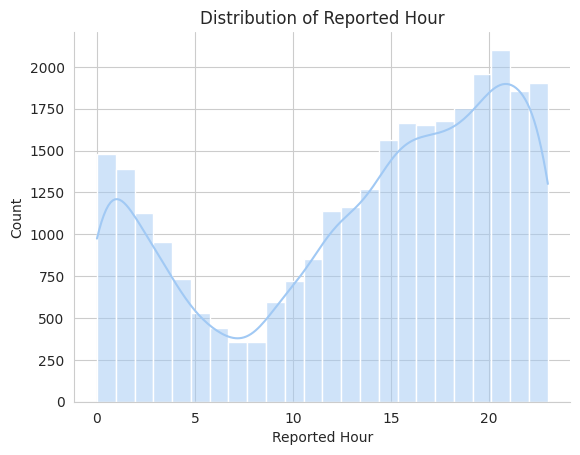

In [ ]:
# Create a histogram of the reported hour column
sns.set_style('whitegrid')
sns.set_palette('pastel')

sns.histplot(data=df, x='reportedhour', bins=24, kde=True)
sns.despine() # remove the top and right spines
plt.xlabel('Reported Hour')
plt.ylabel('Count')
plt.title('Distribution of Reported Hour')
plt.show()

Maps

In [ ]:
import folium
# Create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11, scrollWheelZoom=False)

# Plot the crime locations on the map
for index, row in df.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=1, color='red').add_to(m)

# Display the map
m

Output hidden; open in https://colab.research.google.com to view.

# Which areas in Toronto are most affected by robberies?
Create heat map

In [ ]:

from folium import plugins

# Get the latitude and longitude coordinates of the crime locations
crime_locations = df[['Latitude', 'Longitude']].values.tolist()

# Create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Add a heat map layer to the map
heat_map = plugins.HeatMap(crime_locations)
m.add_child(heat_map)

In [ ]:
from folium.plugins import HeatMapWithTime

# Create a list of lists containing the latitude, longitude, and date of each crime
crime_data = [[[row['Latitude'], row['Longitude']], row['reporteddate']] for index, row in df.iterrows()]

# Create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Create a HeatMapWithTime layer and add it to the map
HeatMapWithTime(crime_data, auto_play=True, max_opacity=0.8, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'},
                min_opacity=0.3, overlay=True, control=True, radius=10, name='Crime Heatmap').add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import folium
from folium import plugins

# Get the latitude and longitude coordinates of the crime locations
crime_locations = df[['Latitude', 'Longitude']].values.tolist()

# Create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=13, tiles='CartoDB positron')

# Add a heat map layer to the map
heat_map = plugins.HeatMap(crime_locations, gradient=['blue', 'yellow', 'red'])
m.add_child(heat_map)


Heat map based on divison

In [ ]:
# Group the crime data by Division and get the latitude and longitude coordinates
crime_locations = []
for name, group in df.groupby('Division'):
    crime_locations.append(group[['Latitude', 'Longitude']].values.tolist())

# Create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Add a heat map layer to the map for each Division
for i, loc in enumerate(crime_locations):
    heat_map = plugins.HeatMap(loc, name=f'Division {i + 1}')
    m.add_child(heat_map)
    # Get the latitude and longitude coordinates for the center of the Division
    center_lat = group['Latitude'].mean()
    center_lon = group['Longitude'].mean()
    # Create a marker for the center of the Division
    marker = folium.Marker(location=[center_lat, center_lon], tooltip=f'Division {i + 1}', icon=None)
    # Add the marker to the map
    m.add_child(marker)

# Add a layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m

In [ ]:
from folium import plugins

# Get a random sample of 50% of the rows in the dataframe
df_sample = df.sample(frac=0.5, random_state=42)

# Get the latitude and longitude coordinates of the crime locations
crime_locations = df_sample[['Latitude', 'Longitude']].values.tolist()

# Create a map of Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Add a heat map layer to the map
heat_map = plugins.HeatMap(crime_locations)
m.add_child(heat_map)


divison based on geojson

In [ ]:
!apt install gdal-bin python-gdal python3-gdal    # Install GDAL
!apt install python3-rtree                       # Install Rtree
!pip install geopandas                           # Install geopandas
import geopandas as gpd

# Read the GeoJSON file into a GeoDataFrame
division_geojson = gpd.read_file('/content/Police Boundaries Data.geojson')

# View the GeoDataFrame
print(division_geojson.head())

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  javascript-common libjs-jquery libjs-underscore libspatialindex-c6
  libspatialindex-dev libspatialindex6
Suggested packages:
  apache2 | lighttpd | httpd
The following NEW packages will be installed:
  javascript-common libjs-jquery libjs-underscore libspatialindex-c6
  libspatialindex-dev libspatialindex6 python3-rtree
0 up

ERROR:fiona._env:/content/Police Boundaries Data.geojson: No such file or directory


DriverError: ignored

In [ ]:
import folium
import pandas as pd


# Group the crime data by division and count the number of crimes for each division
division_crime_counts = df.groupby('Division').size().reset_index(name='crime_count')


# Create a map centered on Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11, scrollWheelZoom=False)
folium.Choropleth(
    geo_data=division_geojson,
    name='Crime Count',
    data=division_crime_counts,
    columns=['Division', 'crime_count'],
    key_on='feature.properties.DIV',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Crimes'
).add_to(m)

for index, row in division_geojson.iterrows():
    division = row['DIV']
    latitude = row.geometry.centroid.y
    longitude = row.geometry.centroid.x
    folium.Marker([latitude, longitude],  tooltip=division).add_to(m)

# # Add a layer control to the map
# folium.LayerControl().add_to(m)

# Display the map
m

Histogram based on divison

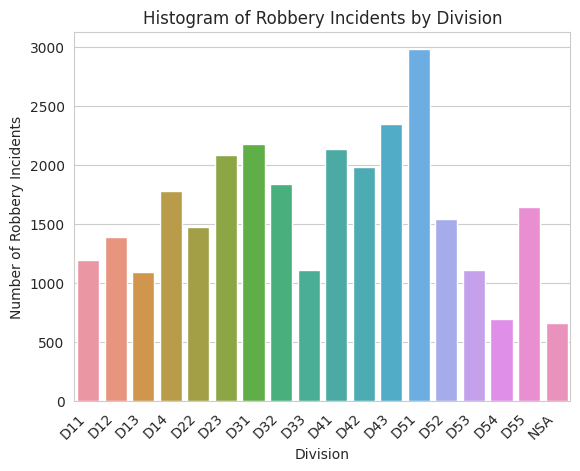

In [ ]:


import seaborn as sns
# Group the data by month and count the number of incidents
divison_robbery = df.groupby('Division')['event_unique_id'].count()


# Create a bar plot of robbery incidents by month
sns.set_style('whitegrid')
sns.set_palette('pastel')

sns.barplot(x=divison_robbery.index, y=divison_robbery.values)

# Set the axis labels and title
plt.xlabel('Division')
plt.ylabel('Number of Robbery Incidents')
plt.title('Histogram of Robbery Incidents by Division')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [ ]:
import random
# Get the unique Division names
divisions = df['Division'].unique()

# Generate a random color for each Division
division_colors = {}
for division in divisions:
    division_colors[division] = "#{:06x}".format(random.randint(0, 0xFFFFFF))
print(division_colors)
# Create a map centered on Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Add a marker for each crime location, colored by Division
for index, row in df.iterrows():
   folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=1, color=division_colors[row['Division']]).add_to(m)

# Display the map
m

In [ ]:
import random
import folium


# Get the unique Division names
premises = df['premises_type'].unique()


# Generate a random color for each Division
crime_colors = {}
for premise in premises:
    crime_colors[premise] = "#{:06x}".format(random.randint(0, 0xFFFFFF))
print(crime_colors)
# Create a map centered on Toronto
m = folium.Map(location=[43.6532, -79.3832], zoom_start=11)

# Add a marker for each crime location, colored by Division
for index, row in df.iterrows():
   folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=1, color=crime_colors[row['premises_type']]).add_to(m)

# Add a legend to the map showing the division colors
legend_html = '<div style="padding: 10px; background-color: white; border-radius: 5px;">'
for premise in premises:
    legend_html += '<div style="display: flex; align-items: center; margin-bottom: 5px;">'
    legend_html += '<div style="width: 20px; height: 20px; margin-right: 5px; background-color: {}"></div>'.format(crime_colors[premise])
    legend_html += '<div>{}</div>'.format(premise)
    legend_html += '</div>'
legend_html += '</div>'

m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m

Output hidden; open in https://colab.research.google.com to view.

# What is the trend of robbery incidents over time?

we can see that it decrease after 2020(covid)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data to include only "Robbery" incidents
df_robbery = df[df['mci_category'] == 'Robbery']

# Group the data by reported year and count the number of incidents
robbery_by_year = df_robbery.groupby('reportedyear')['event_unique_id'].count()

# Filter the data to include only "Robbery" incidents
df_robbery = df[df['mci_category'] == 'Robbery']

# Group the data by reported year and count the number of incidents
robbery_by_year = df_robbery.groupby('reportedyear')['event_unique_id'].count()

# Plot the trend of robbery incidents over time
plt.figure(figsize=(10, 6))
plt.plot(robbery_by_year.index, robbery_by_year.values)
sns.regplot(x=robbery_by_year.index, y=robbery_by_year.values)
sns.set_style('whitegrid')
sns.set_palette('pastel')
plt.xlabel('Reported Year')
plt.ylabel('Number of Robbery Incidents')
plt.title('Trend of Robbery Incidents Over Time')
plt.grid(True)
plt.show()


# Are there any seasonality patterns in the occurrence of robbery incidents?

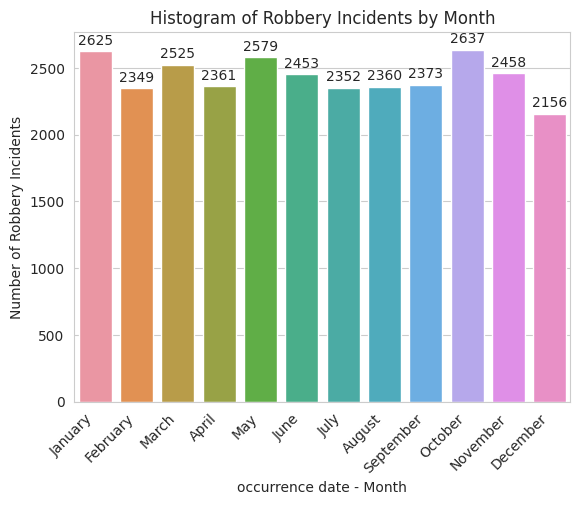

In [ ]:
import calendar

# Filter the data to include only "Robbery" incidents
df_robbery = df[df['mci_category'] == 'Robbery']

# Convert the occurrence date to a datetime object
df_robbery['occurrencedate'] = pd.to_datetime(df_robbery['occurrencedate'])

# Extract the month names and add them as a new column
df_robbery['month_name'] = df_robbery['occurrencedate'].apply(lambda x: calendar.month_name[x.month])
# Set up the plot style

# Group the data by month and count the number of incidents
monthly_robbery = df_robbery.groupby('month_name')['event_unique_id'].count()

# Sort the data by month name
monthly_robbery = monthly_robbery.reindex(calendar.month_name[1:], axis=0)

# Create a bar plot of robbery incidents by month
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the bar plot and get the Axes object
ax = sns.barplot(x=monthly_robbery.index, y=monthly_robbery.values)

# Add text labels to each bar
for i, v in enumerate(monthly_robbery.values):
    ax.text(i, v + 50, str(v), ha='center')

# Set the axis labels and title
plt.xlabel('occurrence date - Month')
plt.ylabel('Number of Robbery Incidents')
plt.title('Histogram of Robbery Incidents by Month')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

# What types of premises are most likely to be targeted by robbers?

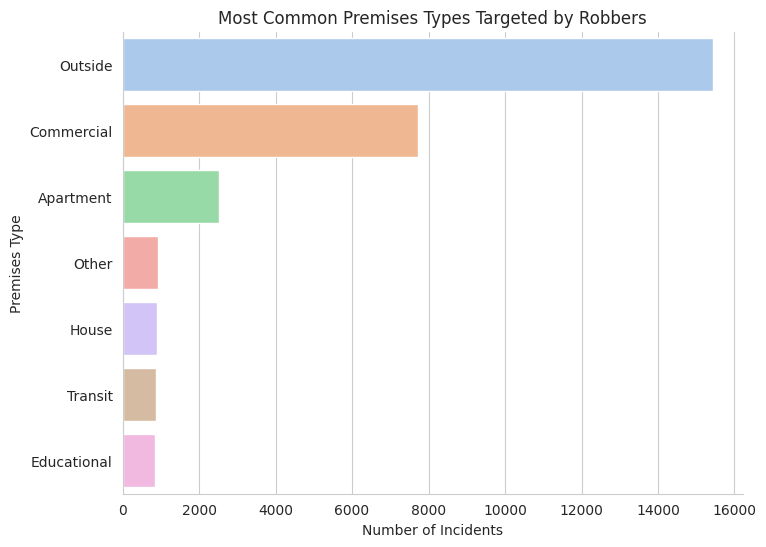

In [ ]:

# Filter the data to include only "Robbery" incidents
df_robbery = df[df['mci_category'] == 'Robbery']

# Count the number of incidents by premises type and sort in descending order
premises_counts = df_robbery['premises_type'].value_counts().sort_values(ascending=False)

# Set up the plot style
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Plot the top 10 premises types
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=premises_counts[:10], y=premises_counts.index[:10], ax=ax)
ax.set(xlabel='Number of Incidents', ylabel='Premises Type', title='Most Common Premises Types Targeted by Robbers')
sns.despine()

plt.show()

# New Section

In [ ]:
unique_location_types = df['location_type'].unique()
print(unique_location_types)

['Schools During Un-Supervised Activity'
 'Streets, Roads, Highways (Bicycle Path, Private Road)'
 'Apartment (Rooming House, Condo)' 'Open Areas (Lakes, Parks, Rivers)'
 'Bar / Restaurant' 'Convenience Stores'
 'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg'
 'Schools During Supervised Activity'
 'Single Home, House (Attach Garage, Cottage, Mobile)'
 'Ttc Subway Station'
 'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)'
 'Homeless Shelter / Mission'
 'Parking Lots (Apt., Commercial Or Non-Commercial)'
 'Bank And Other Financial Institutions (Money Mart, Tsx)'
 'Ttc Subway Train' 'Universities / Colleges'
 'Other Regional Transit System Vehicle'
 "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)"
 'Ttc Bus Stop / Shelter / Loop'
 'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)'
 'Gas Station (Self, Full, Attached Convenience)'
 'Religious Facilities (Synagogue, Church, Convent, Mosque)' 'Go Station

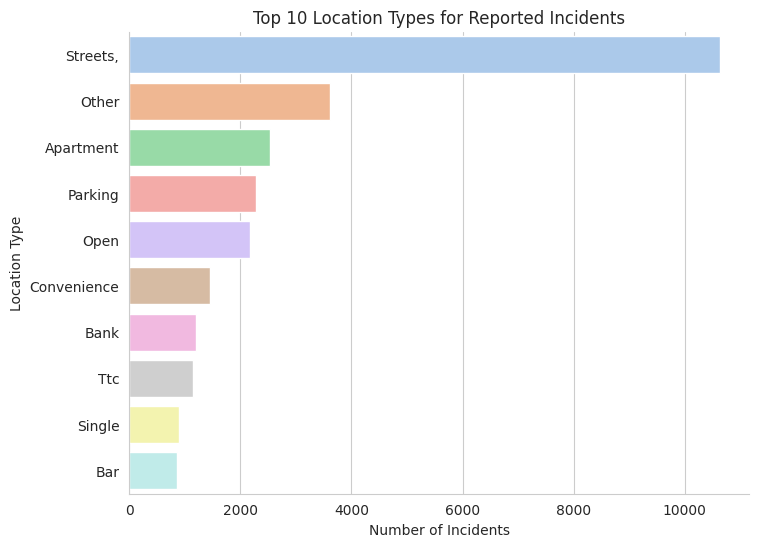

In [ ]:
# Define a function to shorten the location_type values
def shorten_location_type(loc_type):
    # Split the location type into words
    words = loc_type.split()
    # Keep the first word and the first letter of each subsequent word
    return ' '.join([words[0]])

# Apply the function to the location_type column to create a new column with shortened values
df['short_location_type'] = df['location_type'].apply(shorten_location_type)

# Set up the plot style
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create a bar plot of the shortened location types
plt.figure(figsize=(8, 6))
sns.countplot(y='short_location_type', data=df, order=df['short_location_type'].value_counts().index[:10])
sns.despine()
plt.xlabel('Number of Incidents')
plt.ylabel('Location Type')
plt.title('Top 10 Location Types for Reported Incidents')
plt.show()


In [ ]:
# Split the offence column to include only the second part
df['offence'] = df['offence'].str.split(' - ').str[1]


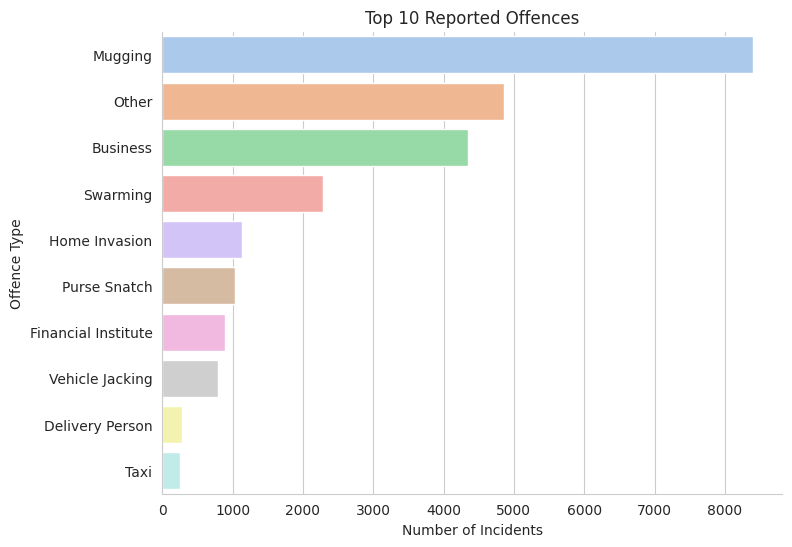

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Set up the plot style
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create a count plot of the offences
plt.figure(figsize=(8, 6))
sns.countplot(y='offence', data=df, order=df['offence'].value_counts().index[:10])
sns.despine()
plt.xlabel('Number of Incidents')
plt.ylabel('Offence Type')
plt.title('Top 10 Reported Offences')
# Save the plot as a PNG file
plt.savefig('top_offences.png')

plt.show()

# Download the saved file
from google.colab import files
files.download('top_offences.png')

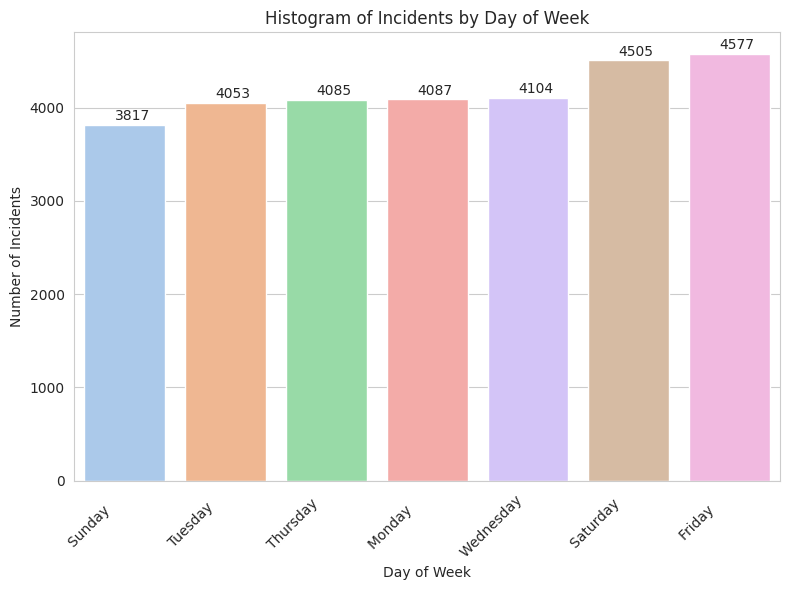

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set up the plot style
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Get counts of incidents by day of the week and sort by count
day_counts = df['occurrencedayofweek'].value_counts().sort_values()

# Create a count plot of the occurrence day of week
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='occurrencedayofweek', data=df, order=day_counts.index)
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.title('Histogram of Incidents by Day of Week')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust plot layout
plt.tight_layout()

# Show and save the plot
plt.show()
plt.savefig('occurrencedayofweek_histogram.png')


Time series analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.head()
print(df.columns)
# # Convert the date column to datetime format and set it as the index

# Resample the data to get the total number of crimes per month
monthly_crime_count = df['premises_type'].resample('reportedmonth').count()

# Plot the time series data
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(monthly_crime_count)
plt.title('Monthly Crime Count in Toronto')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

Index(['X', 'Y', 'OBJECTID', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'mci_category', 'neighborhood_id', 'Neighbourhood', 'Longitude',
       'Latitude', 'ObjectId2', 'short_location_type'],
      dtype='object')


ValueError: ignored

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

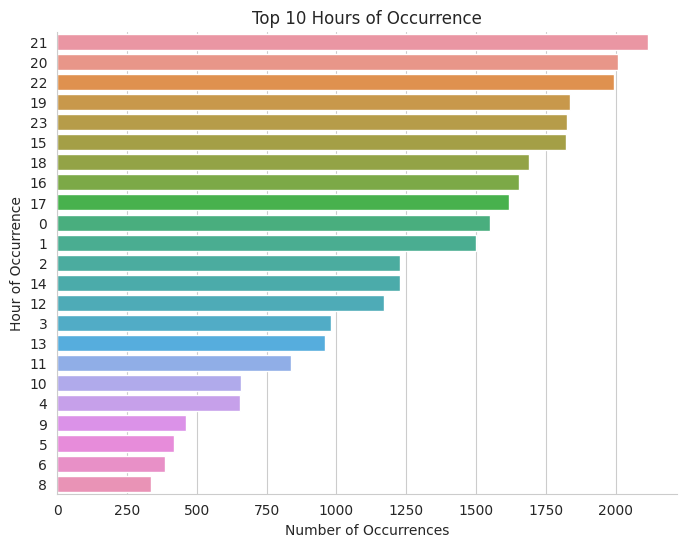

In [ ]:
# Set up the plot style
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create a count plot of the occurrences
plt.figure(figsize=(8, 6))
sns.countplot(y='occurrencehour', data=df,order=df['occurrencehour'].value_counts().index[:23])
sns.despine()
plt.xlabel('Number of Occurrences')
plt.ylabel('Hour of Occurrence')
plt.title('Top 10 Hours of Occurrence')

# Save the plot as a PNG file
plt.savefig('top_occurrence_hours.png')

# Download the saved file
from google.colab import files
files.download('top_occurrence_hours.png')


# REproduceablity

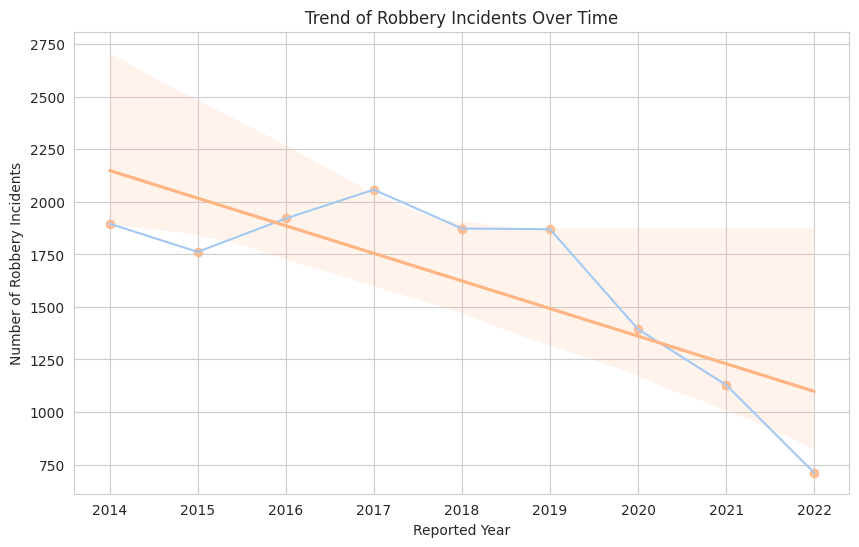

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df2 = df
# Randomly select 70% of the dataset
df2 = df2.sample(frac=0.5, random_state=42)

# Filter the data to include only "Robbery" incidents
df_robbery = df2[df2['mci_category'] == 'Robbery']

# Group the data by reported year and count the number of incidents
robbery_by_year = df_robbery.groupby('reportedyear')['event_unique_id'].count()

# Plot the trend of robbery incidents over time
plt.figure(figsize=(10, 6))
plt.plot(robbery_by_year.index, robbery_by_year.values)
sns.regplot(x=robbery_by_year.index, y=robbery_by_year.values)
sns.set_style('whitegrid')
sns.set_palette('pastel')
plt.xlabel('Reported Year')
plt.ylabel('Number of Robbery Incidents')
plt.title('Trend of Robbery Incidents Over Time')
plt.grid(True)
plt.show()


In [ ]:
import folium
import pandas as pd


# Group the data by crime type and count the number of incidents
crime_counts = df.groupby('premises_type')[['event_unique_id']].count()

# Create a list of unique crime types
crime_types = list(crime_counts.index)

# Define a color scheme for the crime types
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Create a map centered on Toronto
map_center = [43.6532, -79.3832]
m = folium.Map(location=map_center, zoom_start=12)

# Loop through the crime types and create a marker for each one
for i, crime_type in enumerate(crime_types):
    # Filter the data to only include incidents of this crime type
    subset = df[df['premises_type'] == crime_type]
    # Count the number of incidents for each division
    division_counts = subset.groupby('Division')['event_unique_id'].count().to_dict()
    print(division_counts)
    # Create a marker for each division
    for division, count in division_counts.items():
        marker = folium.CircleMarker(location=[subset['Latitude'].iloc[0], subset['Longitude'].iloc[0]], radius=count/50, color=colors[i], fill=True, fill_color=colors[i], popup=f"{crime_type}: {count} incidents in {division}")
        marker.add_to(m)


# Display the map
m



{'D11': 102, 'D12': 160, 'D13': 54, 'D14': 134, 'D22': 71, 'D23': 191, 'D31': 198, 'D32': 86, 'D33': 92, 'D41': 238, 'D42': 81, 'D43': 322, 'D51': 387, 'D52': 99, 'D53': 53, 'D54': 87, 'D55': 162, 'NSA': 16}
{'D11': 343, 'D12': 379, 'D13': 299, 'D14': 473, 'D22': 470, 'D23': 573, 'D31': 460, 'D32': 441, 'D33': 257, 'D41': 512, 'D42': 481, 'D43': 618, 'D51': 652, 'D52': 522, 'D53': 358, 'D54': 129, 'D55': 435, 'NSA': 316}
{'D11': 40, 'D12': 36, 'D13': 26, 'D14': 45, 'D22': 46, 'D23': 70, 'D31': 147, 'D32': 61, 'D33': 35, 'D41': 88, 'D42': 56, 'D43': 73, 'D51': 22, 'D52': 7, 'D53': 26, 'D54': 20, 'D55': 36, 'NSA': 5}
{'D11': 34, 'D12': 54, 'D13': 56, 'D14': 18, 'D22': 53, 'D23': 88, 'D31': 69, 'D32': 63, 'D33': 37, 'D41': 85, 'D42': 172, 'D43': 81, 'D51': 4, 'D52': 1, 'D53': 21, 'D54': 8, 'D55': 30, 'NSA': 18}
{'D11': 20, 'D12': 37, 'D13': 37, 'D14': 43, 'D22': 75, 'D23': 74, 'D31': 46, 'D32': 48, 'D33': 27, 'D41': 79, 'D42': 74, 'D43': 79, 'D51': 108, 'D52': 40, 'D53': 43, 'D54': 20, 'D

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to use for clustering
features = ['Latitude', 'Longitude', 'reportedhour']

# Normalize the selected features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Set the number of clusters
n_clusters = 5

# Apply k-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add a new column to the dataframe with the cluster labels
df['cluster'] = kmeans.labels_

# Visualize the clusters on a map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    cluster_points = list(zip(cluster_df['Latitude'], cluster_df['Longitude']))
    folium.vector_layers.CircleMarker(location=[cluster_df['Latitude'].mean(), cluster_df['Longitude'].mean()],
                                       radius=5,
                                       color=colors[i],
                                       fill=True,
                                       fill_color=colors[i],
                                       fill_opacity=0.8,
                                       popup=f'Cluster {i}',
                                       tooltip=f'Number of points: {len(cluster_df)}').add_to(m)
    folium.vector_layers.PolyLine(cluster_points, color=colors[i], weight=2, opacity=0.8).add_to(m)

# Show the map
m


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to use for clustering
features = ['Latitude', 'Longitude']

# Normalize the selected features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Set the number of clusters
n_clusters = 5

# Apply k-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add a new column to the dataframe with the cluster labels
df['cluster'] = kmeans.labels_

# Visualize the clusters on a map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    cluster_points = list(zip(cluster_df['Latitude'], cluster_df['Longitude']))
    folium.vector_layers.CircleMarker(location=[cluster_df['Latitude'].mean(), cluster_df['Longitude'].mean()],
                                       radius=5,
                                       color=colors[i],
                                       fill=True,
                                       fill_color=colors[i],
                                       fill_opacity=0.8,
                                       popup=f'Cluster {i}',
                                       tooltip=f'Number of points: {len(cluster_df)}').add_to(m)

# Show the map
m


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: 28645 datapoints
Cluster 1: 583 datapoints


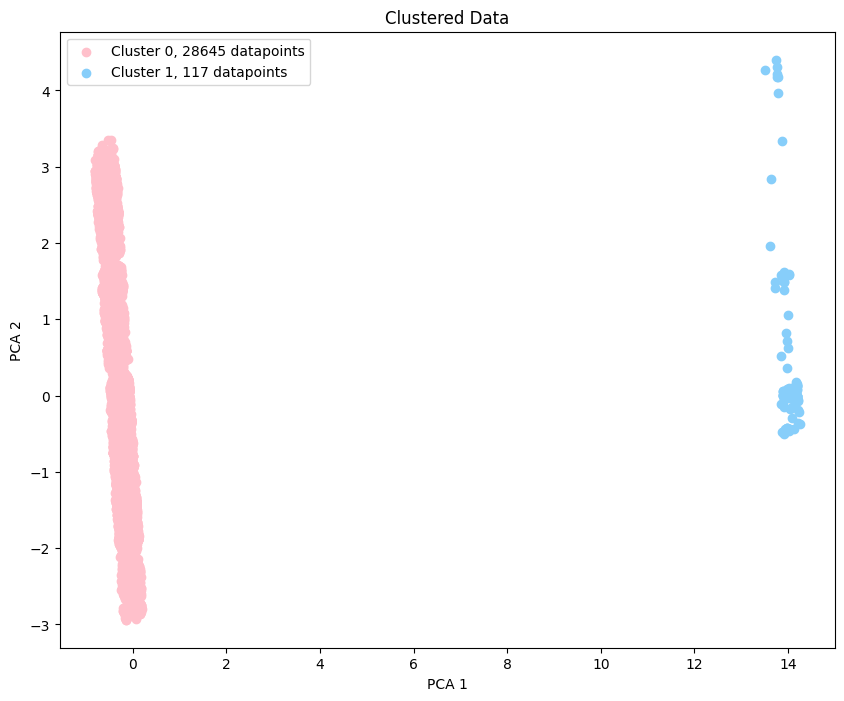

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the location_type column and transform the column
df['location_type_encoded'] = le.fit_transform(df['location_type'])

# Create a LabelEncoder object for each categorical column
le_location_type = LabelEncoder()
le_premises_type = LabelEncoder()
le_occurrenceyear = LabelEncoder()
le_occurrencemonth = LabelEncoder()
le_occurrenceday = LabelEncoder()
le_occurrencehour = LabelEncoder()
le_Division = LabelEncoder()
le_offence = LabelEncoder()

# Fit and transform the categorical columns
df['location_type'] = le_location_type.fit_transform(df['location_type'])
df['premises_type'] = le_premises_type.fit_transform(df['premises_type'])
df['occurrenceyear'] = le_occurrenceyear.fit_transform(df['occurrenceyear'].astype(str))
df['occurrencemonth'] = le_occurrencemonth.fit_transform(df['occurrencemonth'])
df['occurrenceday'] = le_occurrenceday.fit_transform(df['occurrenceday'])
df['occurrencehour'] = le_occurrencehour.fit_transform(df['occurrencehour'])
df['Division'] = le_Division.fit_transform(df['Division'])
df['offence'] = le_offence.fit_transform(df['offence'])

# Select all the features for clustering
features = ['X', 'Y','location_type_encoded','Longitude', 'Latitude','location_type', 'premises_type', 'occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencehour', 'Division', 'offence']

# Normalize the selected features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Set the number of clusters
n_clusters = 2

# Apply k-means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add a new column to the dataframe with the cluster labels
df['cluster'] = kmeans.labels_

# Print the number of datapoints in each cluster
for i in range(n_clusters):
    num_points = len(df[df['cluster'] == i])
    print(f'Cluster {i}: {num_points} datapoints')

# Visualize the clusters on a scatter plot
plt.figure(figsize=(10, 8))
colors = ['#FFC0CB', '#87CEFA', '#98FB98', '#DA70D6', '#FFA07A']
for i in range(n_clusters):
    cluster_df = df[df['cluster'] == i]
    cluster_points = X_pca[df['cluster'] == i]
    if i==1:
      plt.scatter(cluster_points[:100, 0], cluster_points[:100, 1], c=colors[i],label=f'Cluster {i}, {117} datapoints')
    else:
      plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i],label=f'Cluster {i}, {len(cluster_df)} datapoints')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustered Data')
plt.show()


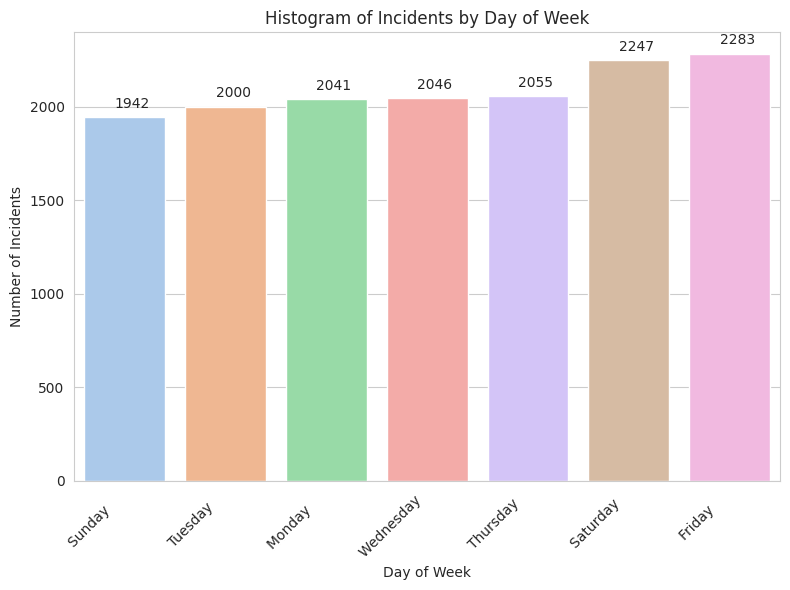

<Figure size 640x480 with 0 Axes>

In [ ]:
# Set up the plot style
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Sample 70% of the dataframe
df_sample = df.sample(frac=0.5)

# Get counts of incidents by day of the week and sort by count
day_counts = df_sample['occurrencedayofweek'].value_counts().sort_values()

# Create a count plot of the occurrence day of week
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='occurrencedayofweek', data=df_sample, order=day_counts.index)
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.title('Histogram of Incidents by Day of Week')

# Add numbers on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust plot layout
plt.tight_layout()

# Show and save the plot
plt.show()
plt.savefig('occurrencedayofweek_histogram.png')


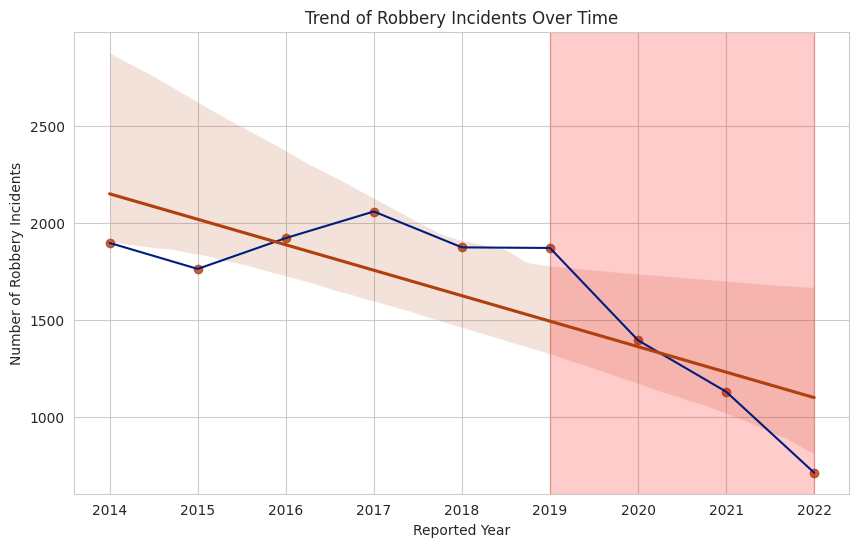

In [ ]:
# Highlight the year 2019-2022 on the x-axis using a different color
df2 = df
# Randomly select 70% of the dataset
df2 = df2.sample(frac=0.5, random_state=42)

# Filter the data to include only "Robbery" incidents
df_robbery = df2[df2['mci_category'] == 'Robbery']

# Group the data by reported year and count the number of incidents
robbery_by_year = df_robbery.groupby('reportedyear')['event_unique_id'].count()

plt.figure(figsize=(10, 6))
plt.plot(robbery_by_year.index, robbery_by_year.values)
sns.regplot(x=robbery_by_year.index, y=robbery_by_year.values)
sns.set_style('whitegrid')
sns.set_palette('dark')
plt.rcParams['lines.linewidth'] = 1.5
plt.xlabel('Reported Year')
plt.ylabel('Number of Robbery Incidents')
plt.title('Trend of Robbery Incidents Over Time')
plt.grid(True)

# Shade the area between the start and end years of interest
plt.axvspan(2019, 2022, color='red', alpha=0.2)

plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Robbery.csv')

# Convert the occurrence date column to datetime type
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])

# Resample the data to monthly counts
monthly_counts = df.resample('M', on='occurrencedate')['OBJECTID'].count()

# Split the data into training and testing sets
train = monthly_counts[:-12] # use the first n-12 months for training
test = monthly_counts[-12:] # use the last 12 months for testing

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(1,1,1)) # use ARIMA(1,1,1) model
results = model.fit()

# Make predictions on the test set
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Print the predicted values and the actual values
print('Predicted:', predictions)
print('Actual:', test)


Predicted: 2021-07-31 00:00:00+00:00    172.502383
2021-08-31 00:00:00+00:00    171.888349
2021-09-30 00:00:00+00:00    171.804519
2021-10-31 00:00:00+00:00    171.793074
2021-11-30 00:00:00+00:00    171.791511
2021-12-31 00:00:00+00:00    171.791298
2022-01-31 00:00:00+00:00    171.791269
2022-02-28 00:00:00+00:00    171.791265
2022-03-31 00:00:00+00:00    171.791264
2022-04-30 00:00:00+00:00    171.791264
2022-05-31 00:00:00+00:00    171.791264
2022-06-30 00:00:00+00:00    171.791264
Freq: M, Name: predicted_mean, dtype: float64
Actual: occurrencedate
2021-07-31 00:00:00+00:00    184
2021-08-31 00:00:00+00:00    214
2021-09-30 00:00:00+00:00    236
2021-10-31 00:00:00+00:00    227
2021-11-30 00:00:00+00:00    252
2021-12-31 00:00:00+00:00    216
2022-01-31 00:00:00+00:00    188
2022-02-28 00:00:00+00:00    179
2022-03-31 00:00:00+00:00    237
2022-04-30 00:00:00+00:00    304
2022-05-31 00:00:00+00:00    254
2022-06-30 00:00:00+00:00    236
Freq: M, Name: OBJECTID, dtype: int64


In [ ]:
import numpy as np

# Combine the predicted and actual values into a single DataFrame
results_df = pd.DataFrame({'predicted': predictions, 'actual': test})

# Add a column for the difference between the predicted and actual values
results_df['difference'] = results_df['predicted'] - results_df['actual']

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs(results_df['difference'] / results_df['actual'])) * 100

# Print the MAPE
print('MAPE:', mape)

# Print the results DataFrame
print(results_df)


MAPE: 22.747507371869112
                            predicted  actual  difference
2021-07-31 00:00:00+00:00  172.502383     184  -11.497617
2021-08-31 00:00:00+00:00  171.888349     214  -42.111651
2021-09-30 00:00:00+00:00  171.804519     236  -64.195481
2021-10-31 00:00:00+00:00  171.793074     227  -55.206926
2021-11-30 00:00:00+00:00  171.791511     252  -80.208489
2021-12-31 00:00:00+00:00  171.791298     216  -44.208702
2022-01-31 00:00:00+00:00  171.791269     188  -16.208731
2022-02-28 00:00:00+00:00  171.791265     179   -7.208735
2022-03-31 00:00:00+00:00  171.791264     237  -65.208736
2022-04-30 00:00:00+00:00  171.791264     304 -132.208736
2022-05-31 00:00:00+00:00  171.791264     254  -82.208736
2022-06-30 00:00:00+00:00  171.791264     236  -64.208736


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read the dataset
df = pd.read_csv('/content/Robbery.csv')

# Convert the occurrence date column to datetime type
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])

# Resample the data to hourly counts
hourly_counts = df.resample('H', on='occurrencedate')['OBJECTID'].count()

# Split the data into training and testing sets
train = hourly_counts[:-24] # use the first n-24 hours for training
test = hourly_counts[-24:] # use the last 24 hours for testing

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(1,1,1)) # use ARIMA(1,1,1) model
results = model.fit()

# Make predictions on the test set
predictions = results.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Find the hour with the highest predicted value
most_dangerous_hour = predictions.idxmax().hour

print('The most dangerous hour is:', most_dangerous_hour)


The most dangerous hour is: 6
